In [6]:
from MCTS import *
from algorithms import *
from simulator import *

In [7]:
lava_maze = """
-----------------
|..L....L....L..|
|..L..LLL..L.LL.|
|..L..L.......L.|
|.....L.....L...|
|..L....L....L..|
|..LLL..L.LLLL..|
|..L.L..L..L....|
|..L....L....L..|
|.....L.....L...|
-----------------
"""

simple_room = """
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............

"""

In [8]:
gif_dir = "./benchmark_gifs/lava_maze/"

In [9]:
env = create_env(make_map(map_str=lava_maze, n_apples=5, premapped=True, start=(1, 1), seed=0), apple_reward=0.75,
                 penalty_time=-0.1)

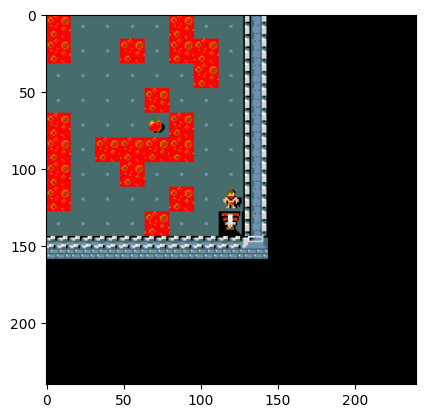

Reward: -0.3499999999999998
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 0.5500000000000003
Number of eaten apples:  3
Path length:  25
Planning time: 0.0011 seconds
Episode terminated with success:  True
Total collected reward:  0.5500000000000003
Simulation completed in 2.27 seconds.
Saving video to ./benchmark_gifs/lava_maze/a_star_apple.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


(0.5500000000000003,
 25,
 0.0010933876037597656,
 3,
 True,
 {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False})

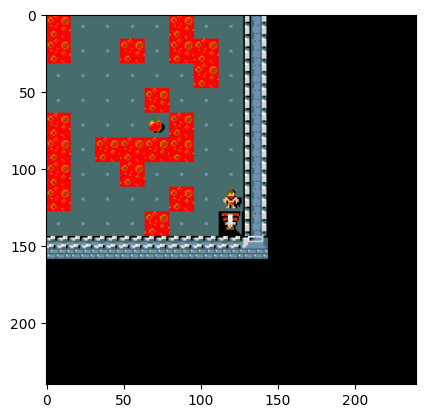

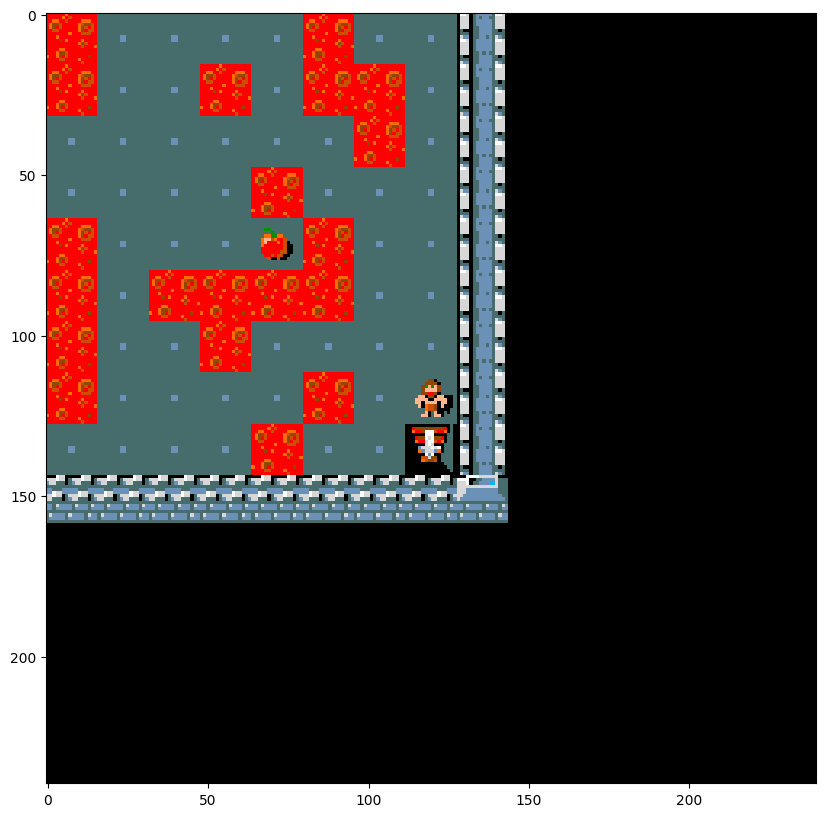

In [10]:
# A star with bonus to tiles that have apples nearby
simulate_offline_planning(env, a_star_apple, h=bfs_path_length, apple_bonus=1.6, weight=0.2, save_dir=gif_dir,
                          gif_name="a_star_apple", wait_time=0)

Player location: (13, 45)
Apple location: []


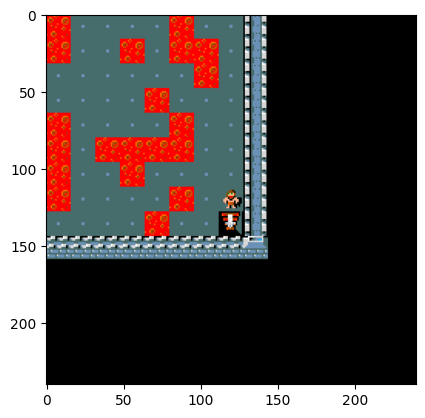

Reward: -0.8000000000000002
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 0.09999999999999987
Number of eaten apples:  5
Path length:  33
Planning time: 0.0073 seconds
Episode terminated with success:  True
Total collected reward:  0.09999999999999987
Simulation completed in 2.66 seconds.
Saving video to ./benchmark_gifs/lava_maze/a_star_collect_apples.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


(0.09999999999999987,
 33,
 0.007291316986083984,
 5,
 True,
 {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False})

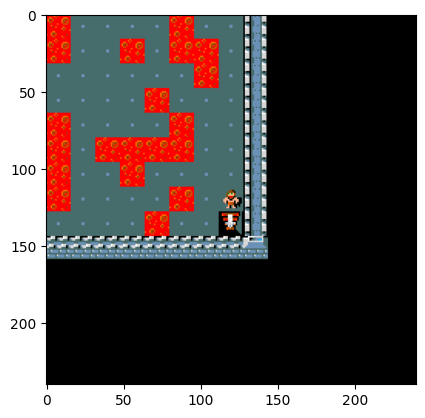

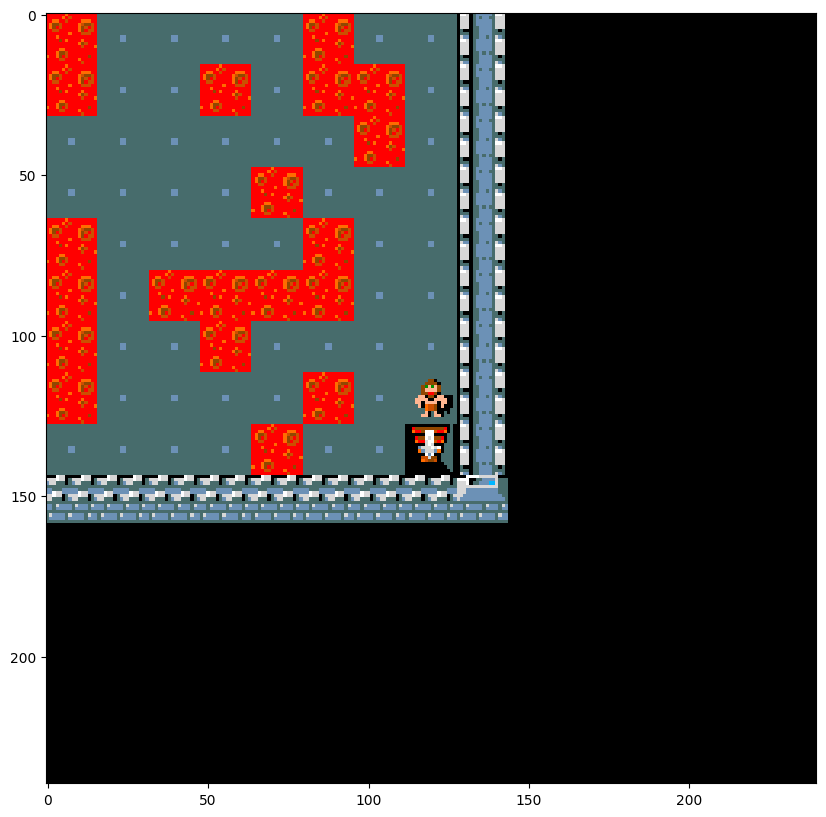

In [11]:
# A* with modified heuristic that considers the distance to apples then stairs
simulate_offline_planning(env, a_star_collect_apples, weight=1.1, save_dir=gif_dir,
                          gif_name="a_star_collect_apples", wait_time=0)

Player location: (13, 44)
Apple location: [(np.int64(10), np.int64(42)), (np.int64(11), np.int64(45))]


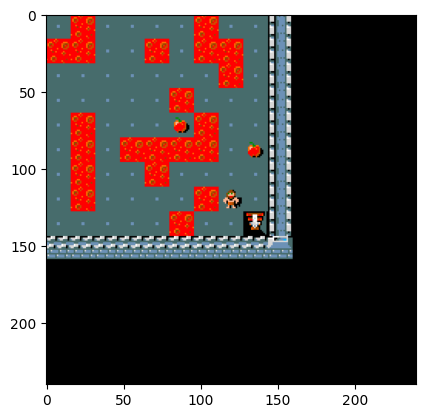

Reward: -0.35
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 0.55
Number of eaten apples:  3
Path length:  25
Planning time: 1.3535 seconds
Episode terminated with success:  True
Total collected reward:  0.55
Simulation completed in 1.96 seconds.
Saving video to ./benchmark_gifs/lava_maze/mcts_random.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


(0.55,
 25,
 1.3535411357879639,
 3,
 True,
 {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False})

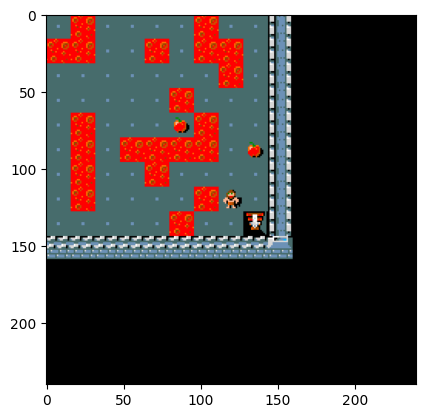

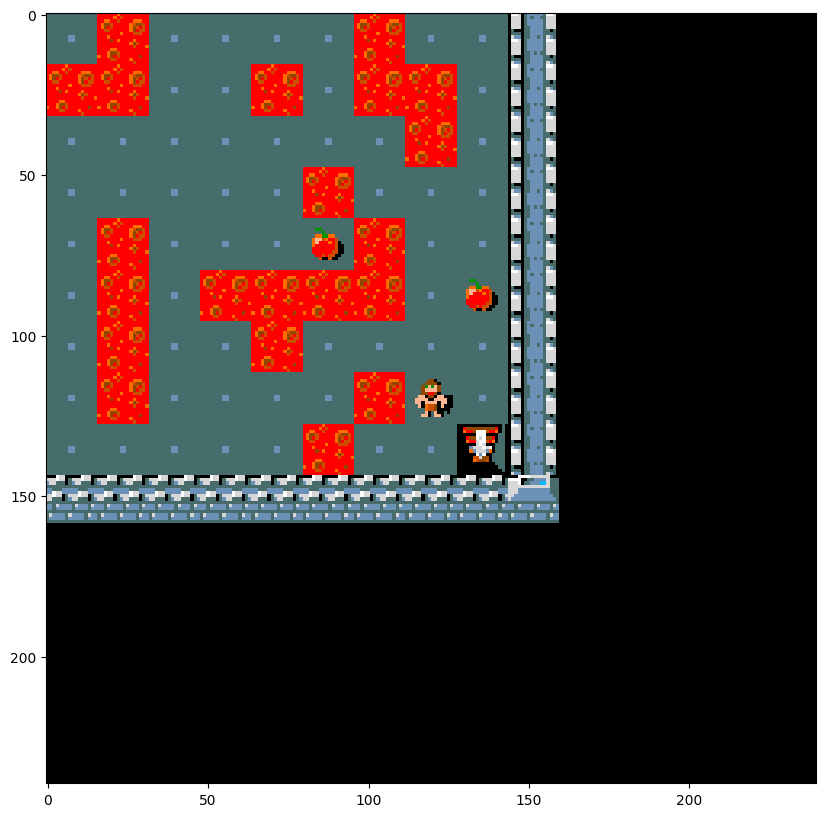

In [12]:
# Monte Carlo with Random
simulate_offline_planning(
    env, mcts, iterations=10000, save_dir=gif_dir,
    gif_name="mcts_random", C=3.0, wait_time=0)

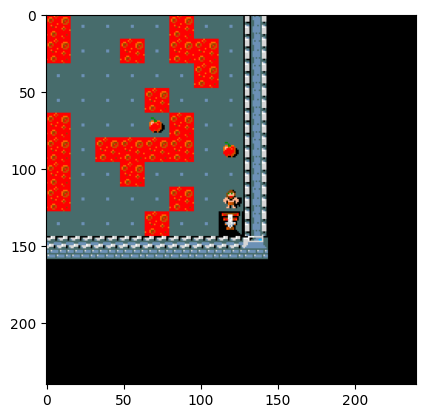

Reward: -1.3000000000000005
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: -0.40000000000000047
Number of eaten apples:  2
Path length:  28
Planning time: 0.0770 seconds
Episode terminated with success:  True
Total collected reward:  -0.40000000000000047
Simulation completed in 2.36 seconds.
Saving video to ./benchmark_gifs/lava_maze/beam_search_apple.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


(-0.40000000000000047,
 28,
 0.0770416259765625,
 2,
 True,
 {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False})

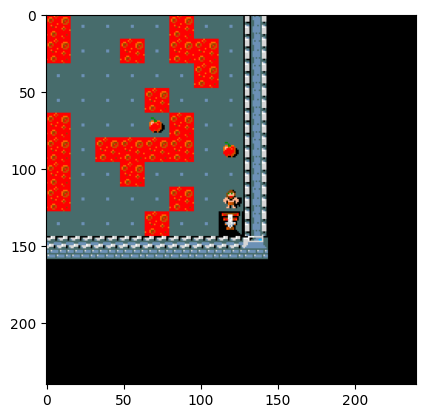

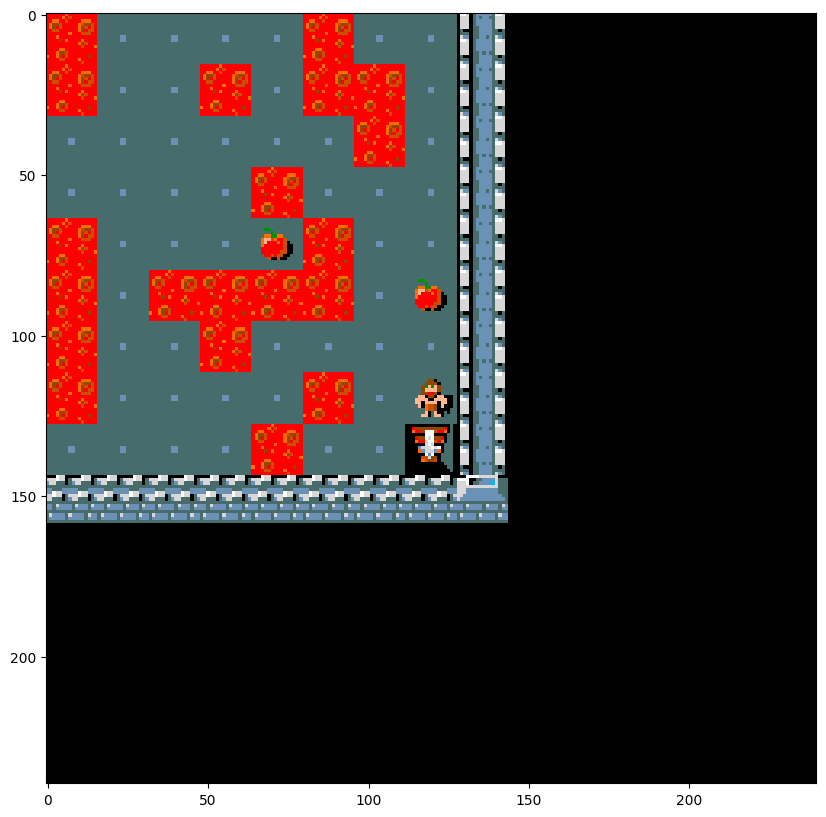

In [13]:
# Beam Search
simulate_offline_planning(
    env, beam_search_apple, apple_reward=10,
    beam_width=4, save_dir=gif_dir,
    gif_name="beam_search_apple", wait_time=0)

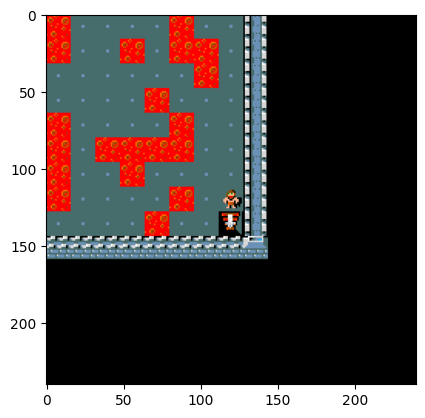

Reward: -3.650000000000002
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: -2.750000000000002
Number of eaten apples:  5
Path length:  71
Planning time: 0.0015 seconds
Episode terminated with success:  True
Total collected reward:  -2.750000000000002
Simulation completed in 6.13 seconds.
Saving video to ./benchmark_gifs/lava_maze/potential_field_path.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


(-2.750000000000002,
 71,
 0.0015382766723632812,
 5,
 True,
 {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False})

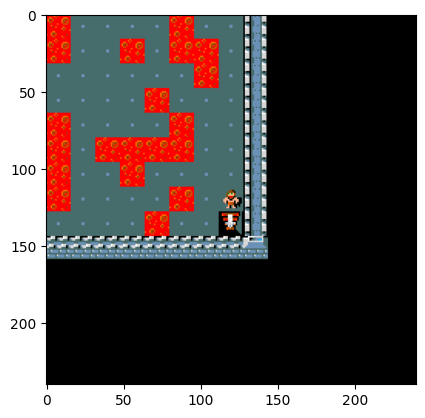

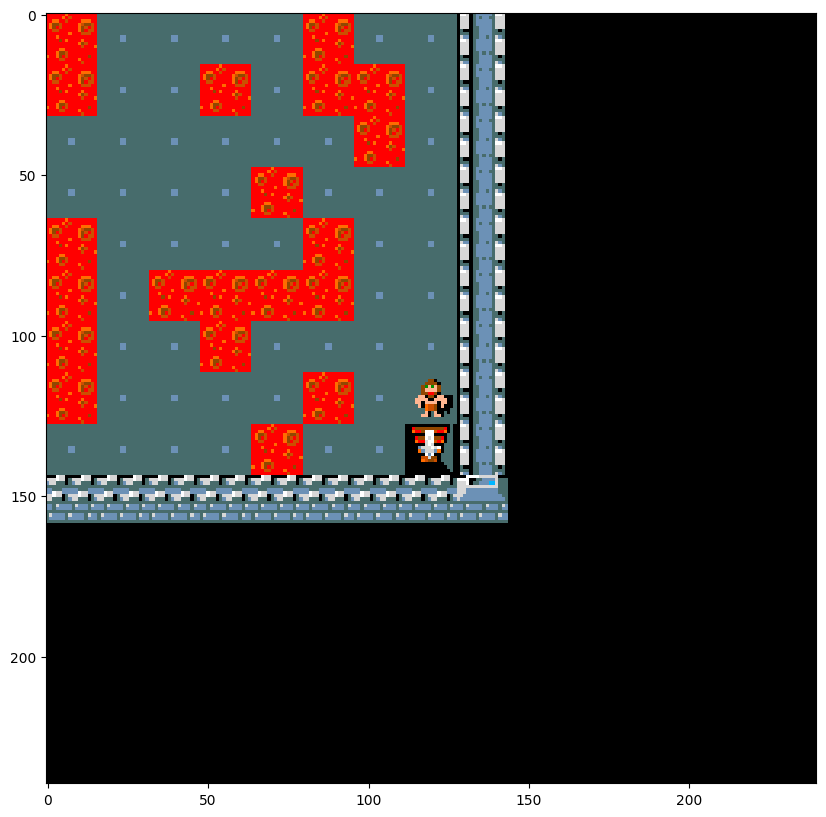

In [14]:
# Potential fields
simulate_offline_planning(
    env, potential_field_path,
    modality_potential="max", weight_apple=0.05,
    save_dir=gif_dir, gif_name="potential_field_path", wait_time=0)

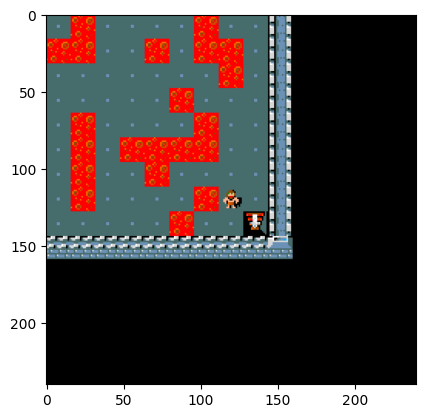

Reward: 0.1500000000000001
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 1.05
Number of eaten apples:  5
Path length:  33
Planning time: 0.0400 seconds
Episode terminated with success:  True
Total collected reward:  1.05
Simulation completed in 2.60 seconds.
Saving video to ./benchmark_gifs/lava_maze/greedy_best_first_search.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


(1.05,
 33,
 0.04003262519836426,
 5,
 True,
 {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False})

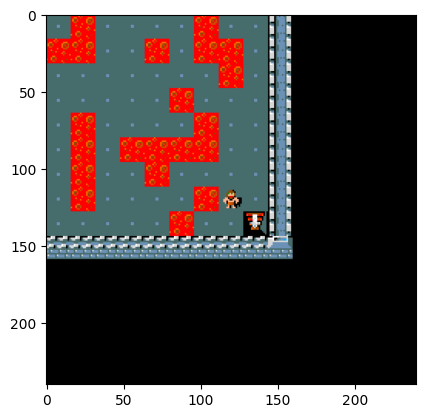

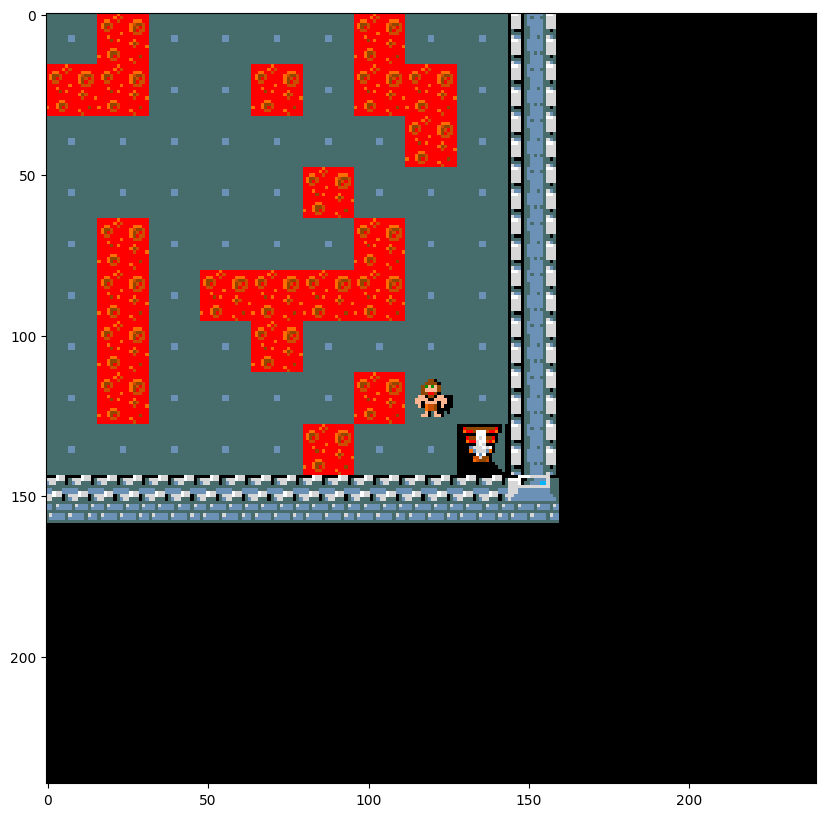

In [15]:
simulate_offline_planning(
    env, greedy_best_first_search, save_dir=gif_dir,
    gif_name="greedy_best_first_search", heuristic=cached_bfs, wait_time=0)

# Online Pathfinding Algorithms

In [16]:
from algorithms_online import *
from simulator import *

simple_maze = """
||||||||||||||||||||||
|....................|
|..|||||.....|..|....|
|..|   |...||||||||..|
|..||| |........|....|
|.....| |||||||.|||..|
|.....|       |.|....|
|.....|       |......|
|||||||  ||||||......|
         |.......|...|
         |.......|||.|
         |...........|
         |||||||||||||
"""

complex_maze = """
               |||||||||||||||||
 ||||||||||    |...............|
 |........|    |............|..|
 |........|    |............|..|
 ||||||...|    |..|||||..||||..|
      |...|    |..|   |........|
      |...|    |..|   |........|  ||||||
|||||||...||||||..|   |.....||||  |....|
|.................|   |.....|     |....|
|..|||||....|..|..|   |.....|||||||....|
|..|   |..|||||||.|   |................|
|..||| |.......|..|   |................|
|....| |||||||.||.|   |....||||||||....|
|....|       |.|..|   |....|      |....|
|....|       |....|   |....||||   |....|
||||||  ||||||....|   |.......|   ||||||
        |......|..|   |.......|
        |......||.|   |.......|
        |.........|   |||||||||
        |||||||||||
"""

In [17]:
gif_dir = "./benchmark_gifs/simple_maze/"
env = create_env(make_map(simple_maze, 5, premapped=False, start=(3, 6), stairs=(10, 10), seed=0),
                 apple_reward=0.75,
                 penalty_time=-0.01)

Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 2.7199999999999998
Simulation completed in 1.10 seconds.
Saving video to ./benchmark_gifs/simple_maze/a_star_apple.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


(2.7199999999999998,
 85,
 0.15491819381713867,
 3,
 True,
 {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False})

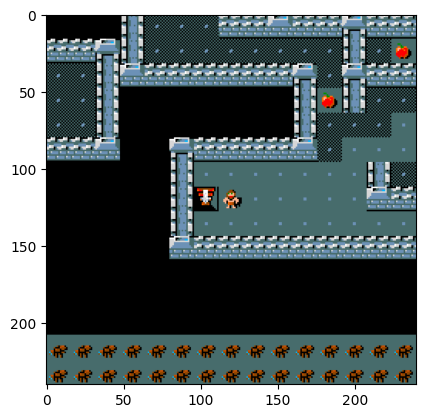

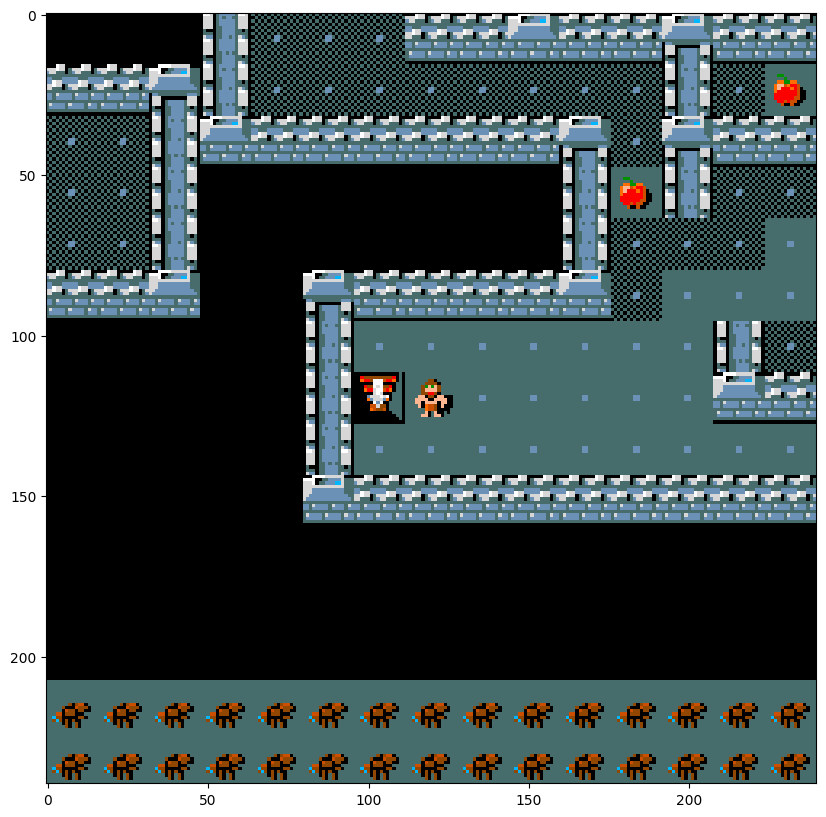

In [18]:
simulate_online(env, planner_online, planner_func=a_star_apple, apple_bonus=5, weight=0.2,
                save_dir=gif_dir, gif_name="a_star_apple", wait_time=0)

Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 3.610000000000001
Simulation completed in 9.12 seconds.
Saving video to ./benchmark_gifs/simple_maze/mcts.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


(3.610000000000001,
 53,
 8.43387246131897,
 4,
 True,
 {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False})

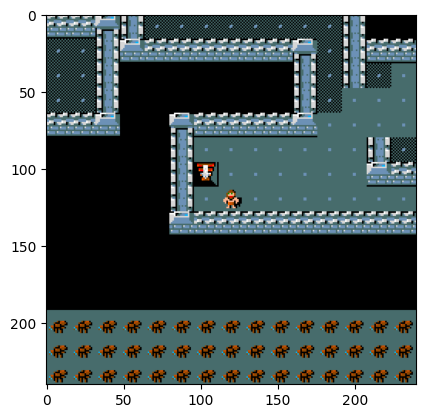

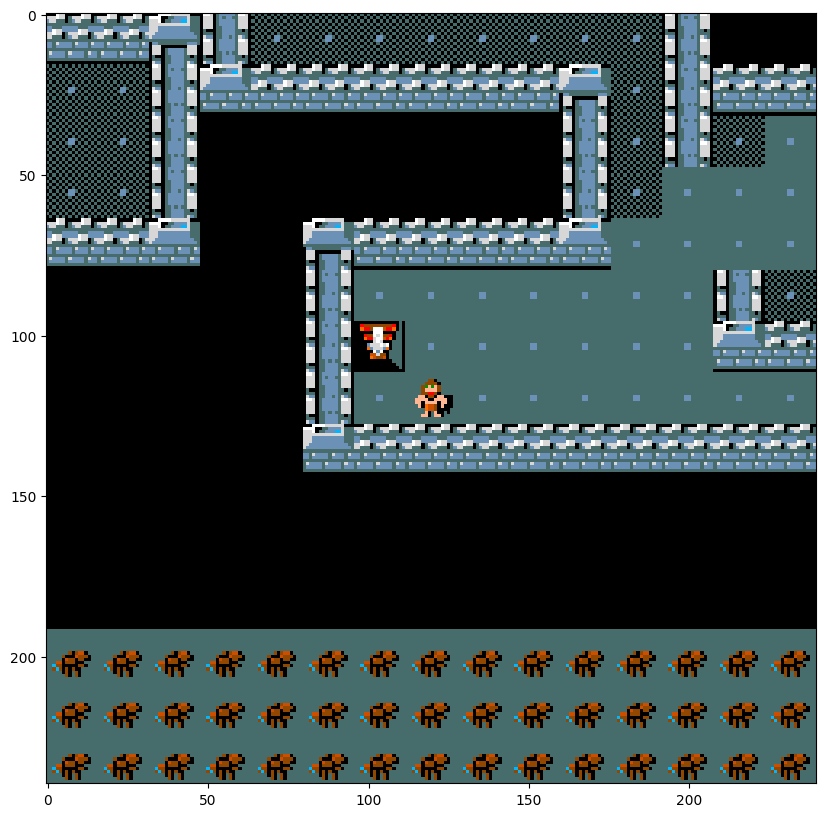

In [19]:
simulate_online(env, planner_online, planner_func=mcts, iterations=10000, C=3.0,
                save_dir=gif_dir, gif_name="mcts", wait_time=0)

Evaluating path...
Finding target from start: (16, 39)
Apple positions: []
Target: (15, 38)
Simulating path: [(16, 39), (15, 38)]
Actions to take: ['UP_LEFT']
Apple collected in the path: 0
Expected Reward:  0.8
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                            ----------------------                             
                            |....................|                             
                            |..-----.....|  |   .|                             
                            |..|   |...------   .|                             
                            |..----|........|  ..|                  

MovieWriter ffmpeg unavailable; using Pillow instead.


(3.540000000000002,
 60,
 0.16387176513671875,
 4,
 True,
 {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False})

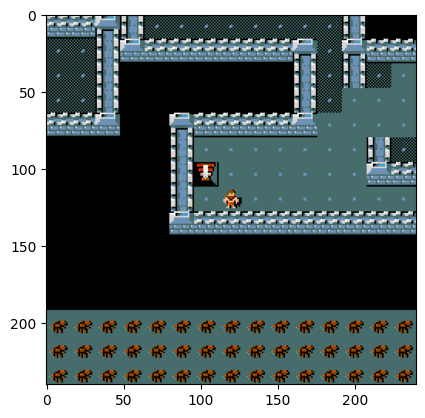

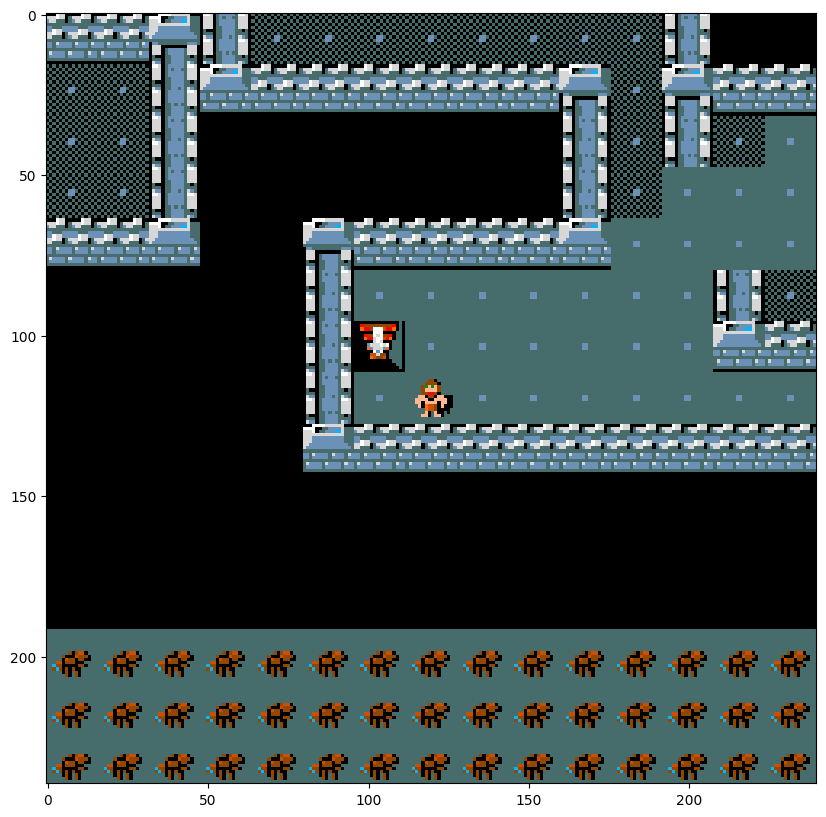

In [20]:
simulate_online(env, planner_online, planner_func=beam_search_apple, apple_reward=9,
                beam_width=10, save_dir=gif_dir, gif_name="beam_search_apple", wait_time=0)

Action taken: LEFT

Player location: (15, 39)
Apple location: []
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 3.7100000000000115
Simulation completed in 1.80 seconds.
Saving video to ./benchmark_gifs/simple_maze/potential_field_path.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


(3.7100000000000115,
 124,
 0.14040040969848633,
 5,
 True,
 {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False})

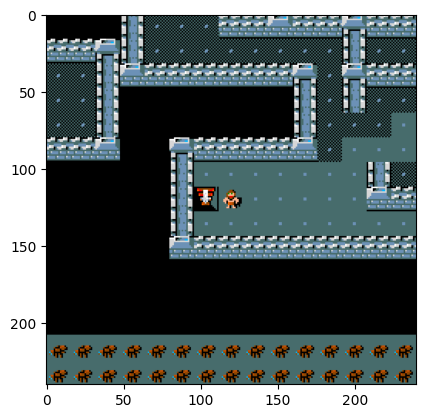

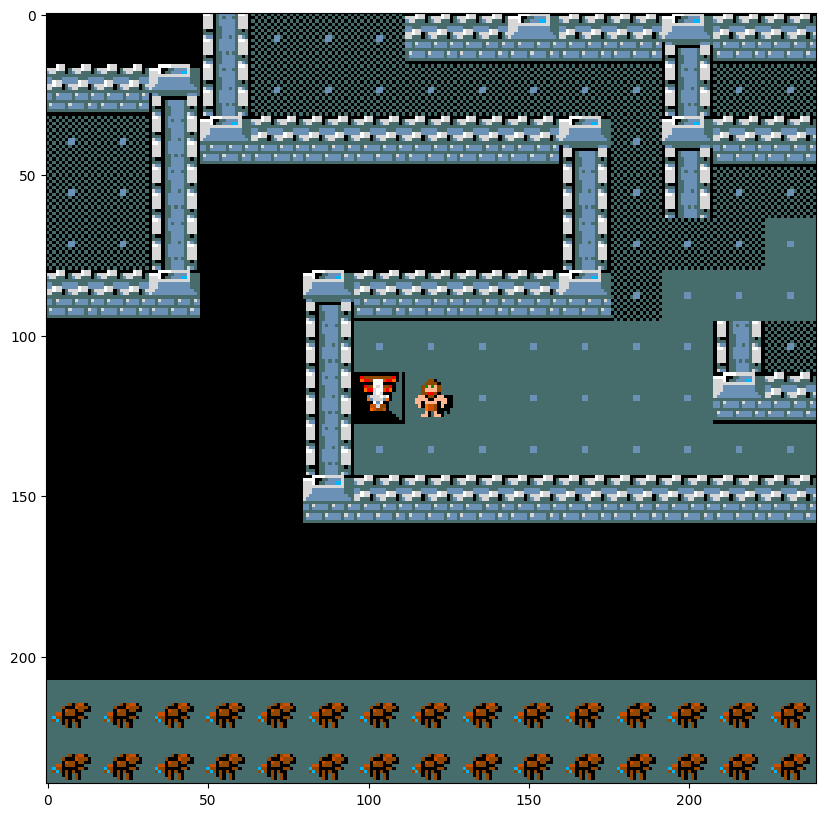

In [21]:
simulate_online(env, planner_online, planner_func=potential_field_path, modality_potential="max", weight_apple=0.25,
                save_dir=gif_dir, gif_name="potential_field_path", wait_time=0)

Action taken: LEFT

Player location: (15, 39)
Apple location: []
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 4.2200000000000015
Simulation completed in 1.13 seconds.
Saving video to ./benchmark_gifs/simple_maze/greedy_best_first_search.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


(4.2200000000000015,
 73,
 0.14348936080932617,
 5,
 True,
 {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False})

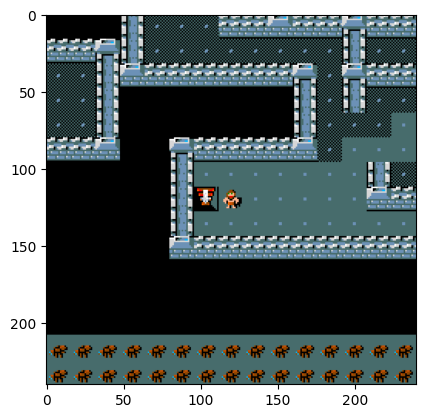

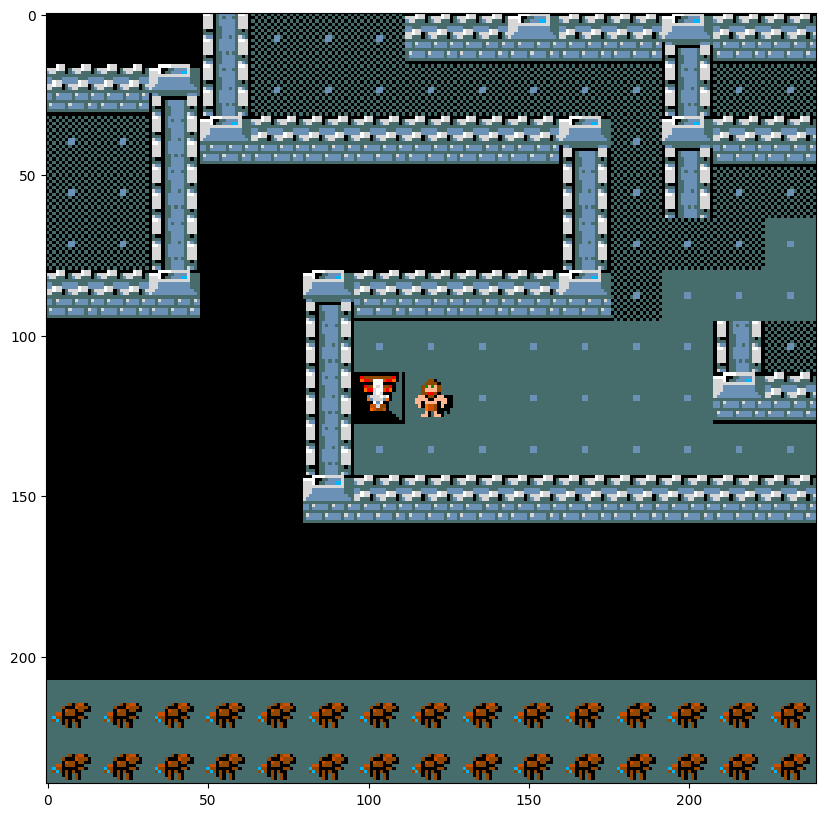

In [22]:
simulate_online(env, planner_online, planner_func=greedy_best_first_search, heuristic=manhattan_distance,
                save_dir=gif_dir, gif_name="greedy_best_first_search", wait_time=0)

In [23]:
gif_dir = "./benchmark_gifs/complex_maze/"

In [24]:
env = create_env(make_map(complex_maze, 5, premapped=False, start=(3, 6), stairs=(37, 13), seed=0),
                 apple_reward=0.75,
                 penalty_time=-0.01)

Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 3.210000000000001
Simulation completed in 1.39 seconds.
Saving video to ./benchmark_gifs/complex_maze/a_star_apple.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


(3.210000000000001,
 89,
 0.17872357368469238,
 4,
 True,
 {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False})

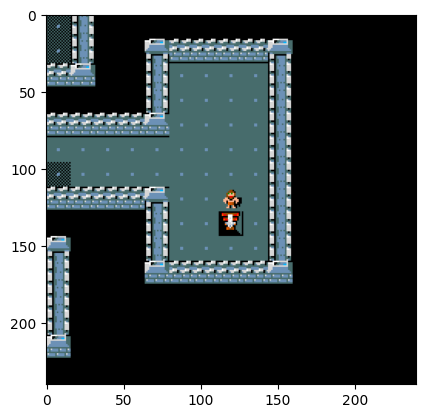

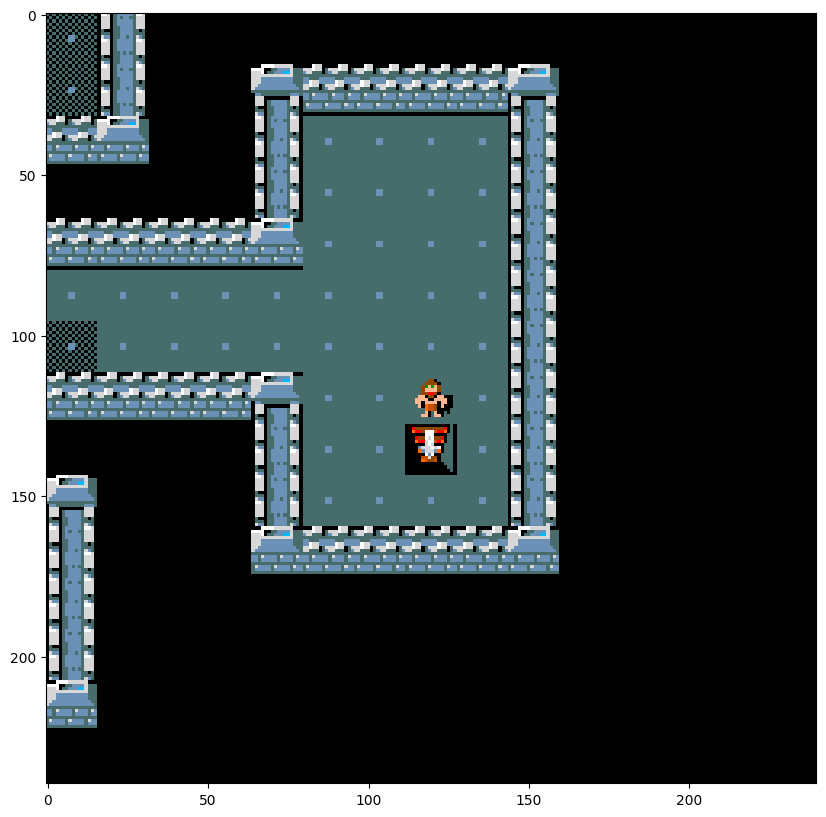

In [25]:
simulate_online(env, planner_online, planner_func=a_star_apple, apple_bonus=5, weight=0.2,
                save_dir=gif_dir, gif_name="a_star_apple", wait_time=0)

Action taken: DOWN_RIGHT

Player location: (13, 56)
Apple location: [(np.int64(8), np.int64(57))]
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 2.009999999999999
Simulation completed in 35.06 seconds.
Saving video to ./benchmark_gifs/complex_maze/mcts.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


(2.009999999999999,
 151,
 33.18885660171509,
 3,
 True,
 {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False})

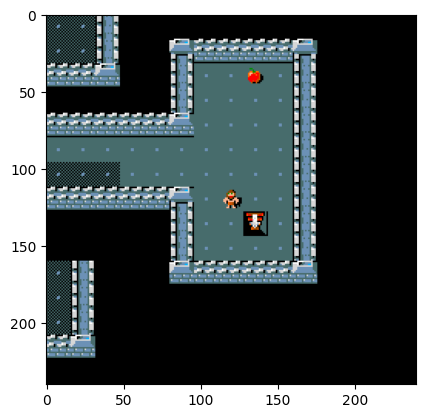

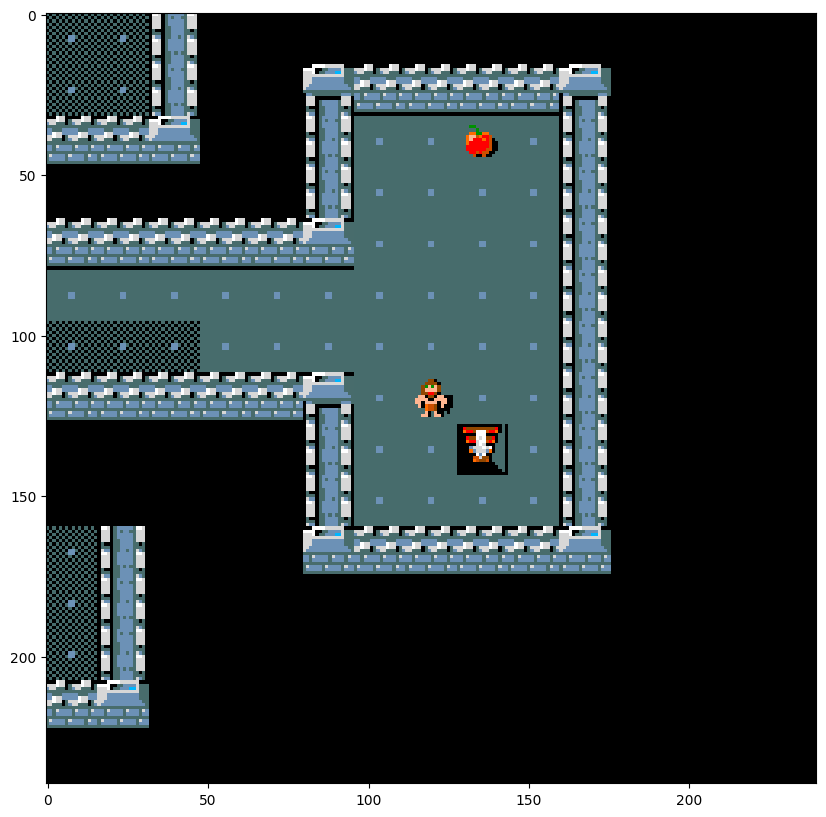

In [26]:
simulate_online(env, planner_online, planner_func=mcts, iterations=10000, C=1.4,
                save_dir=gif_dir, gif_name="mcts", wait_time=0)

Player location: (13, 56)
Apple location: [(np.int64(8), np.int64(57)), (np.int64(11), np.int64(45)), (np.int64(15), np.int64(44))]
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 1.1499999999999992
Simulation completed in 2.49 seconds.
Saving video to ./benchmark_gifs/complex_maze/beam_search_apple.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


(1.1499999999999992,
 173,
 0.5817861557006836,
 2,
 True,
 {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False})

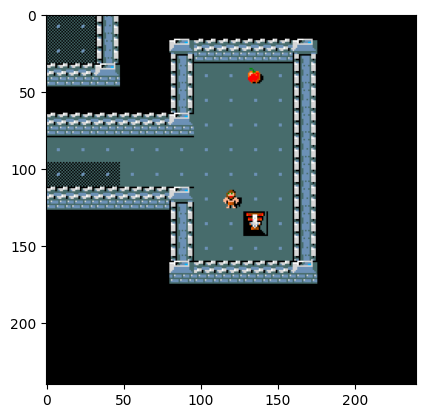

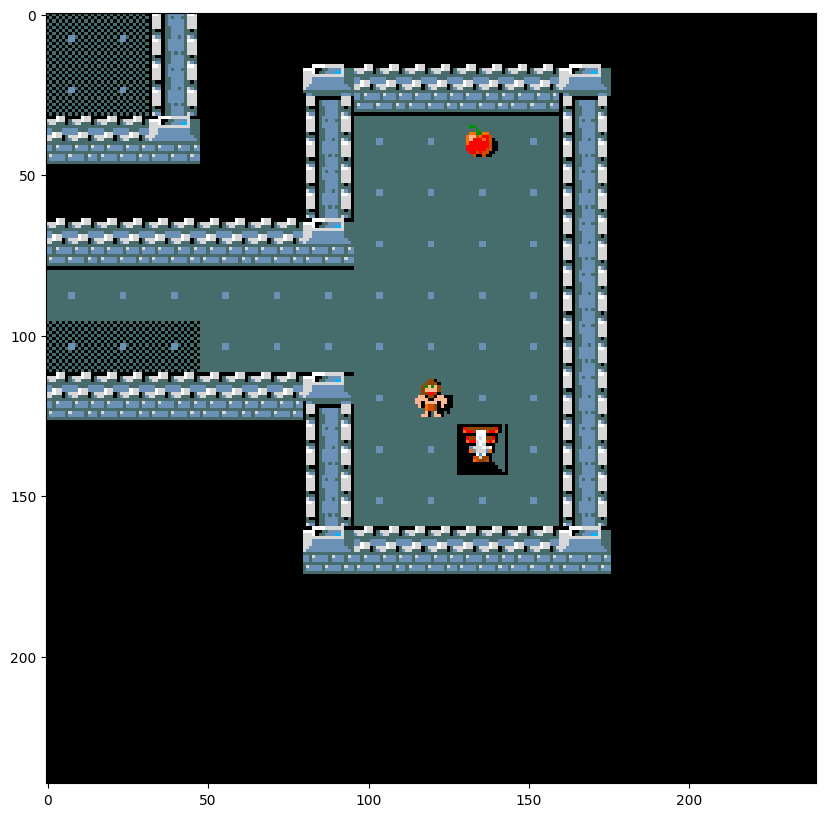

In [27]:
simulate_online(env, planner_online, planner_func=beam_search_apple, apple_reward=6,
                beam_width=4, save_dir=gif_dir, gif_name="beam_search_apple", wait_time=0)

Player location: (13, 57)
Apple location: []
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 2.0699999999999985
Simulation completed in 4.62 seconds.
Saving video to ./benchmark_gifs/complex_maze/potential_field_path.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


(2.0699999999999985,
 209,
 0.2811295986175537,
 4,
 True,
 {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False})

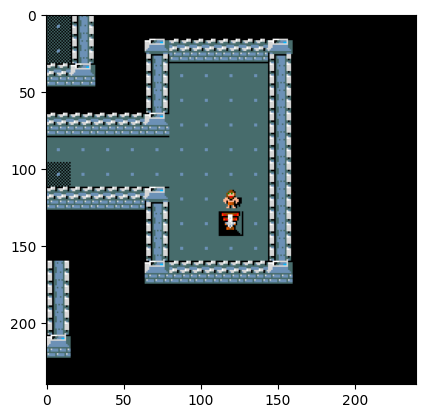

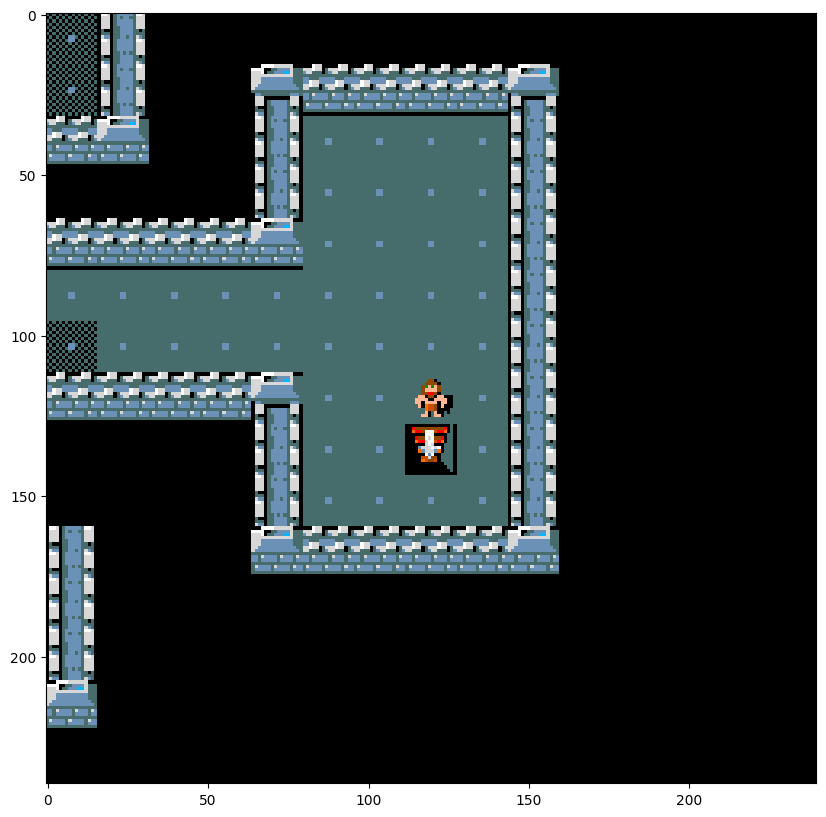

In [28]:
simulate_online(env, planner_online, planner_func=potential_field_path, modality_potential="max", weight_apple=0.3,
                save_dir=gif_dir, gif_name="potential_field_path", wait_time=0)

Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 2.099999999999999
Simulation completed in 2.01 seconds.
Saving video to ./benchmark_gifs/complex_maze/greedy_best_first_search.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


(2.099999999999999,
 136,
 0.25468921661376953,
 3,
 True,
 {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False})

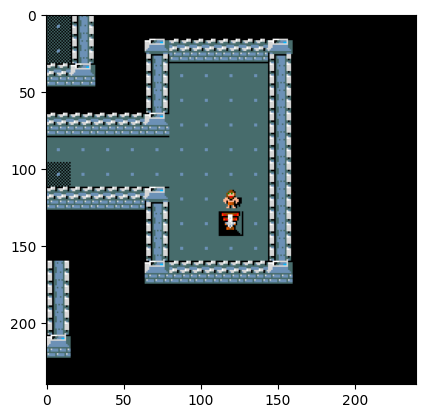

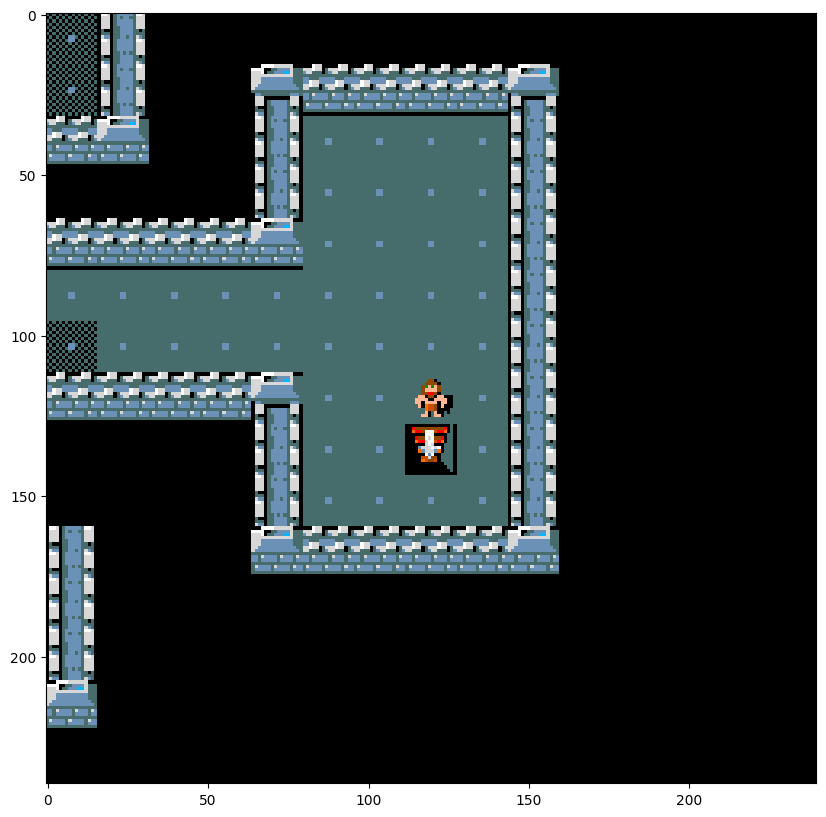

In [29]:
simulate_online(env, planner_online, planner_func=greedy_best_first_search, heuristic=manhattan_distance,
                save_dir=gif_dir, gif_name="greedy_best_first_search", wait_time=0)